# Group 10

# Chamika Gunarathna

Clustering Methods Completed

1. K-means
2. K-medoids
3. Gausian Mixture
4. BIRCH
5. Affinity Propagation

**Analyzing Dataset**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data.csv")
df

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.000000,0.000000,2.759582,0.000000,...,0.000000,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.000000,1.972509,2.218967,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.000000,0.736562,3.543446,0.000000,...,0.000000,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.000000,0.000000,3.762157,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,1
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.000000,0.000000,1.982364,0.000000,...,0.000000,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.000000,1.886433,7.052959,9.965753,7.085977,0.000000,1.008272,1.231801,3.474371,0.419215,...,0.419215,0.000000,0.743558,0.419215,5.993450,10.303747,10.196737,10.920301,0.000000,5
386,0.000000,4.154988,5.868203,10.381900,7.353509,0.000000,0.000000,1.167037,2.243852,0.000000,...,0.000000,0.698485,0.000000,1.803640,6.670826,10.622015,9.567768,10.973898,0.000000,5
387,1.256286,2.155684,6.898692,9.994891,7.849955,0.489235,0.489235,0.853916,2.975098,0.000000,...,0.000000,0.000000,0.000000,1.774966,11.031391,10.641411,9.913281,11.420702,0.000000,5
388,2.423255,3.190883,7.171527,9.156098,7.191207,1.287945,0.566182,1.287945,1.957395,0.000000,...,0.000000,0.000000,0.000000,1.766807,5.419937,9.940838,10.266002,10.171765,0.000000,5


In [4]:
df.columns

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7', 'gene_10',
       'gene_11', 'gene_12', 'gene_13', 'gene_14', 'gene_17', 'gene_18',
       'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24',
       'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30',
       'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36',
       'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42',
       'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48',
       'gene_49', 'Class'],
      dtype='object')

In [7]:
df.isnull()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.count()

gene_1     390
gene_2     390
gene_3     390
gene_4     390
gene_6     390
gene_7     390
gene_10    390
gene_11    390
gene_12    390
gene_13    390
gene_14    390
gene_17    390
gene_18    390
gene_19    390
gene_20    390
gene_21    390
gene_22    390
gene_23    390
gene_24    390
gene_25    390
gene_26    390
gene_27    390
gene_28    390
gene_29    390
gene_30    390
gene_31    390
gene_32    390
gene_33    390
gene_34    390
gene_35    390
gene_36    390
gene_37    390
gene_38    390
gene_39    390
gene_40    390
gene_41    390
gene_42    390
gene_43    390
gene_44    390
gene_45    390
gene_46    390
gene_47    390
gene_48    390
gene_49    390
Class      390
dtype: int64

In [10]:
df.describe()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.00000
mean,3.025948,3.192807,6.834967,9.785579,7.330231,0.482853,0.663875,0.904628,2.654270,0.233360,...,0.093538,0.078761,0.165698,1.727271,6.681075,10.030704,9.841923,11.360233,0.540262,3.00000
std,1.246116,1.049015,0.737371,0.497189,1.032067,0.513565,1.096418,0.903066,0.693793,0.579556,...,0.412052,0.342696,0.370639,2.103633,1.631810,0.664225,0.766911,0.477266,0.583385,1.41603
min,0.000000,0.000000,5.009284,8.435999,4.534466,0.000000,0.000000,0.000000,0.518938,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.140582,7.235344,6.989673,8.724275,0.000000,1.00000
25%,2.341329,2.490260,6.347902,9.444469,6.615592,0.000000,0.000000,0.368878,2.281696,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.683948,9.645791,9.393202,11.086102,0.000000,2.00000
50%,3.165172,3.216300,6.735995,9.761957,7.433040,0.442652,0.361880,0.750814,2.683258,0.000000,...,0.000000,0.000000,0.000000,0.854385,6.623541,10.074549,9.872978,11.387642,0.461318,3.00000
75%,3.857806,3.836318,7.161614,10.125391,7.995617,0.755208,0.931726,1.309511,3.121772,0.205361,...,0.000000,0.000000,0.000000,2.806825,7.781173,10.447166,10.332087,11.701814,0.905428,4.00000
max,6.237034,5.848044,10.129528,11.269372,10.219132,2.779008,8.497022,7.884439,4.658223,5.547931,...,3.909591,4.599282,2.229742,10.119680,11.275316,12.101257,12.055238,12.738084,2.614592,5.00000


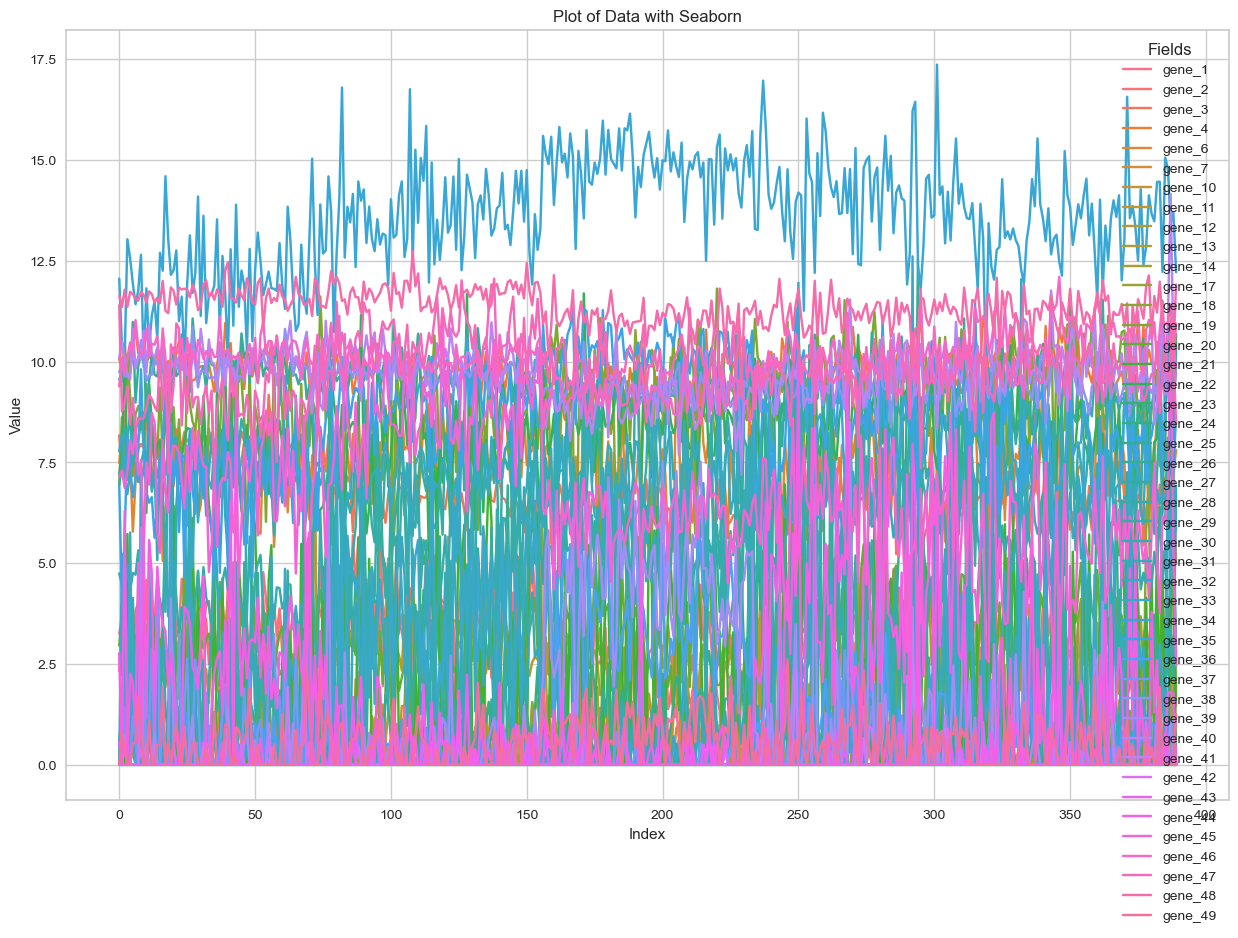

In [17]:
# Plotting with seaborn
plt.figure(figsize=(15, 10))

# Use seaborn's lineplot to plot all fields at once
sns.lineplot(data=df.iloc[:,:-1], dashes=False)

plt.title('Plot of Data with Seaborn')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(title='Fields')
plt.grid(True)
plt.show()

In [11]:
#function to rename array elements
def renameArrayElements(input_,input_elemnt_names,target_elemnt_names):
    new_arr = []
    input_copy = input_.copy()
    for i in range(len(input_)):
        input_element= input_copy[i]
        index = input_elemnt_names.index(input_element)
        output_element=target_elemnt_names[index]
        new_arr.append(output_element)
    
    return np.array(new_arr)

In [35]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

**1. K-means**

In [43]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv("data.csv")
gene_data = df.iloc[:,:-1]
target_labels = df['Class']
target_labels = target_labels.to_numpy()
gene_data.head()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_40,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,10.086269,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,10.499746,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,10.060642,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.0,0.000000,3.762157,0.0,...,9.675841,0.0,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.0,0.000000,1.982364,0.0,...,9.553631,0.0,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000


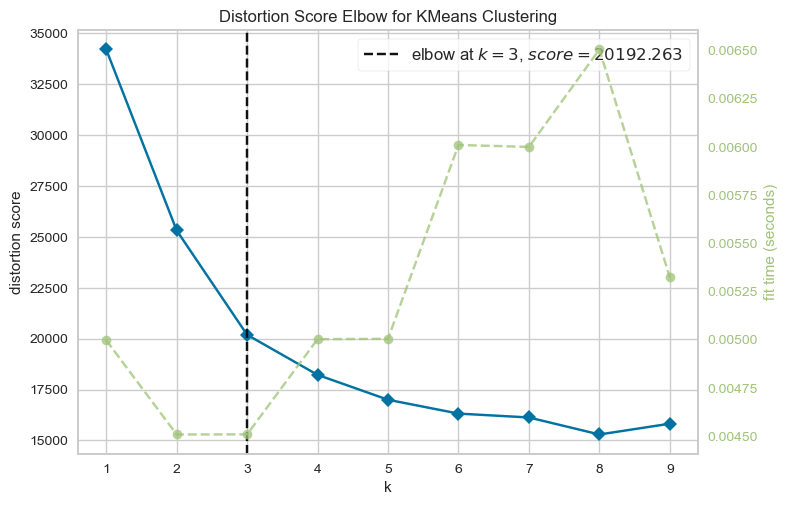

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Since we know there should be 5 categories, number of clusters will be 5.

In [52]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

In [53]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 0, 4, 2, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 3, 4, 4, 0, 3, 0, 0, 3, 2, 3, 0, 0, 3, 0,
       3, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3,

In [54]:
target_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [55]:
accuracy = purity_score(target_labels,kmeans.labels_)
print('Accuracy the above clutering = ', accuracy)

Accuracy the above clutering =  0.8461538461538461


In [56]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.23523933178968695


**2. K-medoids**

In [58]:
from pyclustering.cluster.kmedoids import kmedoids

In [78]:
import pandas as pd
df = pd.read_csv("data.csv")
gene_data = df.iloc[:,:-1]
target_labels = df['Class']
target_labels = target_labels.to_numpy()

In [59]:
# Randomly pick 5 indexs from the original sample as the mediods
initial_medoids = [63, 119, 185, 263, 354]

# Create instance of K-Medoids algorithm with prepared centers.
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

# predict function is not availble in the release branch yet.
# cluster_labels = kmedoids_instance.predict(features.values)

clusters = kmedoids_instance.get_clusters()

# Prepare cluster labels
cluster_labels = np.zeros([390], dtype=int)
for x in np.nditer(np.asarray(clusters[0])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 2
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 3
for x in np.nditer(np.asarray(clusters[3])):
   cluster_labels[x] = 4
for x in np.nditer(np.asarray(clusters[4])):
   cluster_labels[x] = 5

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 5, 5, 5, 2, 5, 2, 5, 2, 2, 2, 2,
       5, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5,
       2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 2, 5, 2, 2, 5, 5, 5, 2, 5, 2, 2,
       2, 5, 2, 5, 5, 5, 2, 1, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 1, 4,
       5, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 5, 5, 4, 1, 4, 4, 5, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 1,
       5, 4, 4, 4, 4, 4, 2, 4, 5, 4, 5, 4, 5, 4, 4,

In [60]:
kmedoids_instance.get_medoids()

[60, 93, 226, 368, 373]

In [61]:
accuracy = purity_score(target_labels,cluster_labels)
print ('Purity score for the above clutering = ', accuracy)

Purity score for the above clutering =  0.7846153846153846


In [62]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.1977053750779964


**3. Gaussian Mixture Models (GMM)**

In [63]:
from sklearn.mixture import GaussianMixture

In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
gene_data = df.iloc[:,:-1]
target_labels = df['Class']
target_labels = target_labels.to_numpy()

Text(0.5, 0, 'Number Of Component')

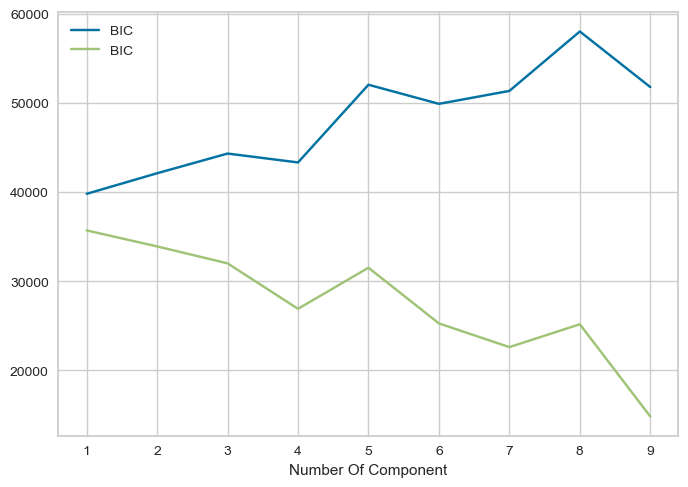

In [64]:
#Determining Optimal 
#Prepare
n_conponent = np.arange(1,10)

#Create GGM Model
models = [GaussianMixture(n_components = n).fit(gene_data) for n in n_conponent]
#Plot
plt.plot(n_conponent,
         [m.bic(gene_data) for m in models],
         label = 'BIC')
plt.plot(n_conponent,
         [m.aic(gene_data) for m in models],
         label = 'BIC')
plt.legend()
plt.xlabel("Number Of Component")

It seem 7 is the number of components suggests by algorithm, since we know there are only 5 categories let's go with n=5

In [65]:
# create GM Models
model = GaussianMixture(n_components=5).fit(gene_data)
cluster = pd.Series(model.predict(gene_data))

In [66]:
final_clusters = np.array(cluster)
final_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 0, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,

In [67]:
accuracy = purity_score(target_labels,final_clusters)
print ('Purity score for the above clutering = ', accuracy)

Purity score for the above clutering =  0.9102564102564102


In [68]:
silhouette_avg = metrics.silhouette_score(gene_data, final_clusters)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.23053707199660206


**4. BIRCH**

In [69]:
from sklearn.cluster import Birch

In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
gene_data = df.iloc[:,:-1]
target_labels = df['Class']
target_labels = target_labels.to_numpy()

In [70]:
brc = Birch(n_clusters=5)
brc.fit(gene_data)

Birch(n_clusters=5)

In [73]:
predicted_labels = brc.predict(gene_data)

predicted_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [74]:
accuracy = purity_score(target_labels,predicted_labels)
print ('Purity score for the above clutering = ', accuracy)

Purity score for the above clutering =  0.8102564102564103


In [75]:
silhouette_avg = metrics.silhouette_score(gene_data, predicted_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.22211101718731305


**5. Affinity Propagation**

In [80]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.cluster import AffinityPropagation

In [81]:
df = pd.read_csv("data.csv")
gene_data = df.iloc[:,:-1]
target_labels = df['Class']
target_labels = target_labels.to_numpy()

In [82]:
X = gene_data.to_numpy()

In [83]:
centers = [X[63], X[119], X[185], X[263], X[354]]
labels_true = target_labels

In [84]:
af = AffinityPropagation(preference=-1258, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 5
Homogeneity: 0.668
Completeness: 0.695
V-measure: 0.681
Adjusted Rand Index: 0.590
Adjusted Mutual Information: 0.677
Silhouette Coefficient: 0.327


In [85]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1,
       4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
       1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1,
       1, 4, 1, 4, 4, 4, 1, 0, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 4, 4, 4, 0, 3,
       3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 0, 3, 0, 3, 4, 4, 3, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 0,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 1,

In [86]:
purity = purity_score(target_labels,labels)
print ('Purity score for the above clutering = ', purity)

Purity score for the above clutering =  0.7948717948717948


In [87]:
silhouette_avg = metrics.silhouette_score(gene_data, labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.20661005871134647


# Sasmeetha Perera

In [3]:
import pandas as pd

df = pd.read_csv('data.csv')

In [4]:
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.0,0.000000,3.762157,0.0,...,0.0,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,1
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.0,0.000000,1.982364,0.0,...,0.0,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,1


In [5]:
print(df.describe())

           gene_1      gene_2      gene_3      gene_4      gene_6      gene_7  \
count  390.000000  390.000000  390.000000  390.000000  390.000000  390.000000   
mean     3.025948    3.192807    6.834967    9.785579    7.330231    0.482853   
std      1.246116    1.049015    0.737371    0.497189    1.032067    0.513565   
min      0.000000    0.000000    5.009284    8.435999    4.534466    0.000000   
25%      2.341329    2.490260    6.347902    9.444469    6.615592    0.000000   
50%      3.165172    3.216300    6.735995    9.761957    7.433040    0.442652   
75%      3.857806    3.836318    7.161614   10.125391    7.995617    0.755208   
max      6.237034    5.848044   10.129528   11.269372   10.219132    2.779008   

          gene_10     gene_11     gene_12     gene_13  ...     gene_41  \
count  390.000000  390.000000  390.000000  390.000000  ...  390.000000   
mean     0.663875    0.904628    2.654270    0.233360  ...    0.093538   
std      1.096418    0.903066    0.693793    0.5

1. K-Means Clustering

In [14]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

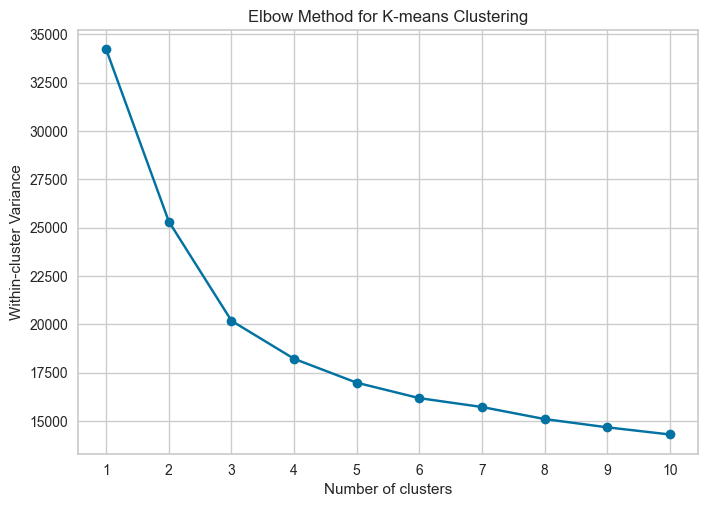

In [15]:
df1 = pd.read_csv('data.csv')

#Defining attributes and categories
attributes = df1.iloc[:, 0:44]
categories = df1.iloc[:, -1]

#Calculate within-cluster variance for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(attributes)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')  # Adjusted x-axis range
plt.title('Elbow Method for K-means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Variance')
plt.xticks(np.arange(1, 11, 1))  # Show all integer ticks on x-axis
plt.grid(True)
plt.savefig('elbow_method_plot.png')
plt.show()

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(attributes) + 1

df1['Cluster'] = cluster_labels

print(df1)

       gene_1    gene_2    gene_3     gene_4    gene_6    gene_7   gene_10  \
0    2.325242  3.247092  8.174007  10.065053  7.487446  0.000000  0.000000   
1    3.446190  3.620962  7.171917   9.796559  8.175245  1.972509  0.000000   
2    2.554196  1.296134  8.770277  10.462901  8.013993  0.000000  0.000000   
3    3.667699  3.083179  7.997292   9.516886  7.925424  0.732486  0.000000   
4    3.821935  3.717605  7.593100  10.205964  7.613185  0.000000  0.000000   
..        ...       ...       ...        ...       ...       ...       ...   
385  0.000000  1.886433  7.052959   9.965753  7.085977  0.000000  1.008272   
386  0.000000  4.154988  5.868203  10.381900  7.353509  0.000000  0.000000   
387  1.256286  2.155684  6.898692   9.994891  7.849955  0.489235  0.489235   
388  2.423255  3.190883  7.171527   9.156098  7.191207  1.287945  0.566182   
389  1.455281  2.775535  5.009284   9.995894  7.806421  0.000000  0.000000   

      gene_11   gene_12   gene_13  ...   gene_42   gene_43   ge

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(attributes) + 1

df1['Cluster'] = cluster_labels
# Evaluate clustering quality using Silhouette coefficient
silhouette_avg = silhouette_score(attributes, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

# Calculate purity
def calculate_purity(labels_true, labels_pred):
    cluster_labels = pd.Series(labels_pred)
    true_labels = pd.Series(labels_true)
    matrix = pd.crosstab(cluster_labels, true_labels)
    return np.sum(np.max(matrix, axis=0)) / np.sum(matrix.values)

# True labels are in the last column of the dataframe
true_labels = df1.iloc[:, -2].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)

Silhouette Coefficient: 0.16551778429701616
Purity: 0.8615384615384616


2. K-Medoids Clustering

In [20]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score

df2 = pd.read_csv('data.csv')

X = df2.drop(columns=['Class'])

n_clusters = 5

kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)

kmedoids.fit(X)

cluster_labels = kmedoids.labels_

cluster_medoids = kmedoids.cluster_centers_

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

db_index = davies_bouldin_score(X, cluster_labels)
print("Davies–Bouldin index:", db_index)

true_labels = df2.iloc[:, -1].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)


Silhouette Score: 0.17392066991528263
Davies–Bouldin index: 2.6331428791262725
Purity: 0.7307692307692307


3. DBSCAN Clustering

In [21]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

df3 = pd.read_csv('data.csv')
x = df3.drop(columns=['Class'])

dbscan = DBSCAN(eps=6, min_samples=5)
cluster_labels = dbscan.fit_predict(x)

silhouette = silhouette_score(x, cluster_labels)
print("Silhouette Score:", silhouette)

rand_index = adjusted_rand_score(df3.iloc[:,-1], cluster_labels)
print(f"Adjusted Rand Index: {rand_index}")

true_labels = df3.iloc[:, -1].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)

Silhouette Score: 0.12086391058514394
Adjusted Rand Index: 0.3621602472278582
Purity: 0.7256410256410256


4. Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

df4 = pd.read_csv('data.csv')
x = df4.drop(columns=['Class'])

hierarchical = AgglomerativeClustering(n_clusters=5)

hierarchical.fit(x)

cluster_labels = hierarchical.labels_

silhouette = silhouette_score(x, cluster_labels)
print("Silhouette Score:", silhouette)

true_labels = df4.iloc[:, -1].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)


Silhouette Score: 0.22211101718731305
Purity: 0.8307692307692308


# Sanjitha Amarathunga

In [3]:
print("Add Individual contribution From this Cell, delete this print msg after initiation")

Add Individual contribution From this Cell, delete this print msg after initiation


# Umesha Sewwandi

In [4]:

import pandas as pd

In [5]:
df = pd.read_csv('DNA_Dataset_Normalized.csv')

In [6]:
df.describe()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.00000
mean,3.025948,3.192807,6.834967,9.785579,7.330231,0.482853,0.663875,0.904628,2.654270,0.233360,...,0.093538,0.078761,0.165698,1.727271,6.681075,10.030704,9.841923,11.360233,0.540262,3.00000
std,1.246116,1.049015,0.737371,0.497189,1.032067,0.513565,1.096418,0.903066,0.693793,0.579556,...,0.412052,0.342696,0.370639,2.103633,1.631810,0.664225,0.766911,0.477266,0.583385,1.41603
min,0.000000,0.000000,5.009284,8.435999,4.534466,0.000000,0.000000,0.000000,0.518938,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.140582,7.235344,6.989673,8.724275,0.000000,1.00000
25%,2.341329,2.490260,6.347902,9.444469,6.615592,0.000000,0.000000,0.368878,2.281696,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.683948,9.645791,9.393202,11.086102,0.000000,2.00000
50%,3.165172,3.216300,6.735995,9.761957,7.433040,0.442652,0.361880,0.750814,2.683258,0.000000,...,0.000000,0.000000,0.000000,0.854385,6.623541,10.074549,9.872978,11.387642,0.461318,3.00000
75%,3.857806,3.836318,7.161614,10.125391,7.995617,0.755208,0.931726,1.309511,3.121772,0.205361,...,0.000000,0.000000,0.000000,2.806825,7.781173,10.447166,10.332087,11.701814,0.905428,4.00000
max,6.237034,5.848044,10.129528,11.269372,10.219132,2.779008,8.497022,7.884439,4.658223,5.547931,...,3.909591,4.599282,2.229742,10.119680,11.275316,12.101257,12.055238,12.738084,2.614592,5.00000


In [7]:
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.0,0.000000,3.762157,0.0,...,0.0,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,1
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.0,0.000000,1.982364,0.0,...,0.0,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,1


In [8]:
df.shape

(390, 45)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gene_1   390 non-null    float64
 1   gene_2   390 non-null    float64
 2   gene_3   390 non-null    float64
 3   gene_4   390 non-null    float64
 4   gene_6   390 non-null    float64
 5   gene_7   390 non-null    float64
 6   gene_10  390 non-null    float64
 7   gene_11  390 non-null    float64
 8   gene_12  390 non-null    float64
 9   gene_13  390 non-null    float64
 10  gene_14  390 non-null    float64
 11  gene_17  390 non-null    float64
 12  gene_18  390 non-null    float64
 13  gene_19  390 non-null    float64
 14  gene_20  390 non-null    float64
 15  gene_21  390 non-null    float64
 16  gene_22  390 non-null    float64
 17  gene_23  390 non-null    int64  
 18  gene_24  390 non-null    float64
 19  gene_25  390 non-null    float64
 20  gene_26  390 non-null    float64
 21  gene_27  390 non

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Assuming 'Cancer_Class' is the column representing cancer classes
X = df.drop('Class', axis=1)
y_true = df['Class']

# Assuming 'Cancer_Class' is the column representing cancer classes
X = df.drop('Class', axis=1)
y_true = df['Class']

# Create and fit the Mean Shift model
mean_shift_model = MeanShift()
cluster_labels = mean_shift_model.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

rand_score = adjusted_rand_score(y_true, cluster_labels)
print(f"Adjusted Rand Score: {rand_score}")


Silhouette Score: 0.15728291767829722
Adjusted Rand Score: 1.3903801144746294e-05


In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Extract gene type data (features) and cancer class labels
X = df.iloc[:, :-1]  # Assuming the last column is the cancer class
y_true = df.iloc[:, -1]  # True cancer class labels

# Apply DBSCAN
epsilon = 6 # Adjust as needed
min_samples = 5  # Adjust as needed

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
y_pred = dbscan.fit_predict(X)

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(X, y_pred)
rand_index = adjusted_rand_score(y_true, y_pred)

# Print Results
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Adjusted Rand Index: {rand_index}")


Silhouette Coefficient: 0.12086391058514394
Adjusted Rand Index: 0.3621602472278582


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('DNA_Dataset_Normalized.csv')

In [12]:
data_for_clustering = df[['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7', 'gene_10',
       'gene_11', 'gene_12', 'gene_13', 'gene_14', 'gene_17', 'gene_18',
       'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24',
       'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30',
       'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36',
       'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42',
       'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48',
       'gene_49', 'Class']]

In [13]:
import numpy as np
# Calculate purity
purity = np.sum(np.amax(data_for_clustering, axis=0)) / np.sum(data_for_clustering)
print("Purity:", purity)

Purity: gene_1      0.311238
gene_2      0.294972
gene_3      0.137790
gene_4      0.096243
gene_6      0.128480
gene_7      1.950467
gene_10     1.418624
gene_11     1.041079
gene_12     0.354820
gene_13     4.035770
gene_14     4.983209
gene_17    24.217925
gene_18     0.425390
gene_19     0.105422
gene_20     0.295499
gene_21     0.391190
gene_22     0.114289
gene_23          inf
gene_24    10.010855
gene_25     1.646767
gene_26     0.349121
gene_27     0.100828
gene_28     0.215887
gene_29     0.163139
gene_30     0.315160
gene_31     0.706891
gene_32     0.136985
gene_33     0.485639
gene_34     0.069182
gene_35     0.110340
gene_36     0.807840
gene_37     3.048226
gene_38     0.098784
gene_39     0.686175
gene_40     0.096718
gene_41    10.068491
gene_42    11.957543
gene_43     5.683771
gene_44     0.545247
gene_45     0.140964
gene_46     0.093891
gene_47     0.095692
gene_48     0.082902
gene_49     1.743207
Class       0.313930
dtype: float64


c:\Users\USER\anaconda3\envs\DMgroupproject\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [14]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3], dtype=int64)

In [15]:
import os

# Set OMP_NUM_THREADS environment variable to 2
os.environ["OMP_NUM_THREADS"] = "2"

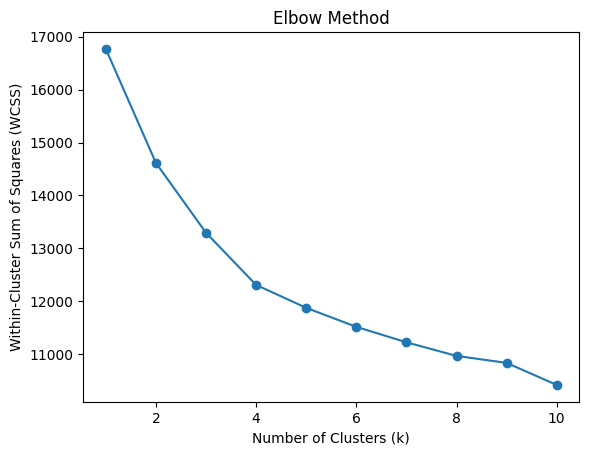

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract features and standardize them
features = df.iloc[:, :-1]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)



wcss = []    # List to store Within-Cluster Sum of Squares (WCSS) for different values of k

for k in range(1, 11):   # Loop through different values of k (number of clusters)
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10 , random_state=0)
    kmeans.fit(features_standardized)
    wcss.append(kmeans.inertia_)   # Append WCSS to the list
    
# Plot the Elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

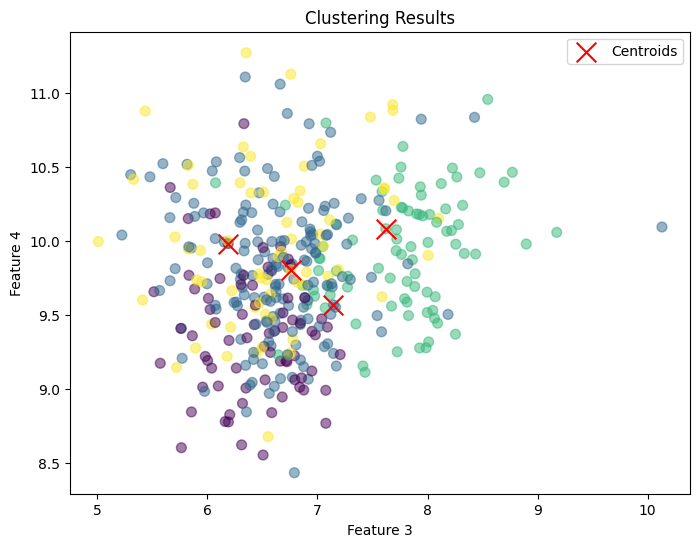

In [19]:
# Q3: K-medoids clustering with k=4 and evaluation
df = pd.read_csv('DNA_Dataset_Normalized.csv')
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, random_state=0)
cluster_labels = kmedoids.fit_predict(df)

# Get the coordinates of the cluster centroids
centroids = kmedoids.cluster_centers_

# Assuming df is the DataFrame and cluster_labels contains the cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 3], marker='x', c='red', s=200, label='Centroids')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.title('Clustering Results')
plt.legend()
plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()         # Scale the data using Min-Max scaling
scaled_data= scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=0)   # Perform K-means clustering with k=3
cluster_labels = kmeans.fit_predict(scaled_data)

silhouette_avg_kmean = silhouette_score(scaled_data, cluster_labels)   # Evaluate clustering using Silhouette coefficient
print("Silhouette Coefficient:", silhouette_avg_kmean)
# Evaluate clustering using purity
# Assuming we have the ground truth labels in the last column of the dataset
true_labels = scaled_data[:, -1]
kmean_purity = completeness_score(true_labels, cluster_labels)
print("Purity:", kmean_purity)

Silhouette Coefficient: 0.08893015204237378
Purity: 0.7522603988793853


c:\Users\USER\anaconda3\envs\DMgroupproject\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [21]:
print(df.columns)

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7', 'gene_10',
       'gene_11', 'gene_12', 'gene_13', 'gene_14', 'gene_17', 'gene_18',
       'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24',
       'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30',
       'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36',
       'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42',
       'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48',
       'gene_49', 'Class'],
      dtype='object')


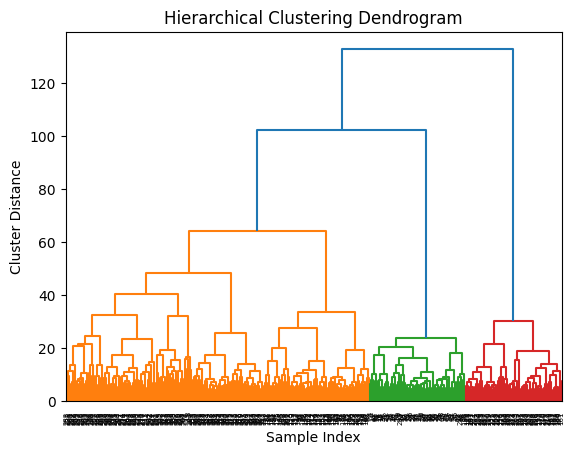

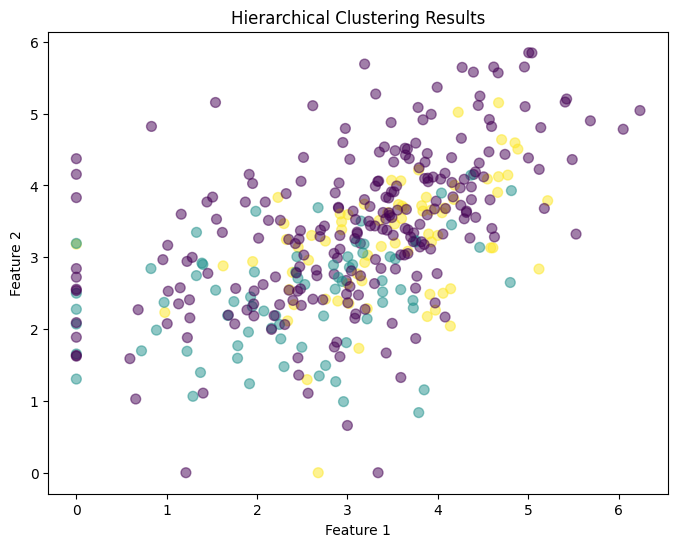

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming you have a DataFrame named df with your data
# You can load your data using pd.read_csv or any other method

# Example data loading:
# df = pd.read_csv('your_data.csv')

# Assuming you want to cluster based on certain columns (adjust as needed)
data_for_clustering = df[['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7', 'gene_10',
       'gene_11', 'gene_12', 'gene_13', 'gene_14', 'gene_17', 'gene_18',
       'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24',
       'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30',
       'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36',
       'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42',
       'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48',
       'gene_49', 'Class']]

# Perform hierarchical clustering
# You can choose the linkage method (ward, complete, average, etc.)
# The number of clusters can be specified using the n_clusters parameter
# Here, I'm using ward linkage as an example
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agglomerative.fit_predict(data_for_clustering)

# Plot the dendrogram (optional, for visualization of the hierarchy)
linked = linkage(data_for_clustering, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

# Plot the data points with colors representing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering Results')
plt.show()


In [23]:
# Assuming you have your data and performed hierarchical clustering
linked_matrix = linkage(df, 'ward')

# Access the linkage matrix
print("Linkage Matrix:")
print(linked_matrix)

Linkage Matrix:
[[157.         215.           2.98587657   2.        ]
 [123.         130.           3.35296341   2.        ]
 [187.         223.           3.42890262   2.        ]
 ...
 [773.         775.          64.36961655 239.        ]
 [766.         776.         102.51628151 314.        ]
 [770.         777.         132.85709748 390.        ]]


In [24]:
# Assuming you have performed hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agglomerative.fit_predict(df)

# Access the cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data from CSV file
df = pd.read_csv('DNA_Dataset_Normalized.csv')

# Assuming your data has features in columns, you may select the relevant columns for clustering
# Replace 'feature1' and 'feature2' with the actual column names in your dataset
X = df[['feature1', 'feature2']].values

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Normalized DNA Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, s=30, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()